# Getting Started
If you are interested in using satellite imagery, check out this dataset https://www.kaggle.com/rhammell/ships-in-satellite-imagery

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
PATH = "data/sat-ships/"
sz=80

In [43]:
os.listdir(f'{PATH}valid')

['is_ship', 'not_ship']

(80, 80, 3)


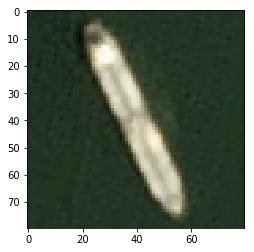

In [66]:
files = os.listdir(f'{PATH}valid/is_ship')[:5]
files

img = plt.imread(f'{PATH}valid/is_ship/{files[0]}')
print(img.shape)
plt.imshow(img);

(80, 80, 3)


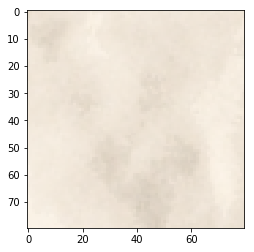

In [45]:
files = os.listdir(f'{PATH}valid/not_ship')[:5]
files

img = plt.imread(f'{PATH}valid/not_ship/{files[0]}')
print(img.shape)
plt.imshow(img);

# Write the code to fit the network


# Explore the results? Are they what you expect?